# Data Loading
Load the dataset, display basic information about the dataset including shape, columns, and data types. Show first few rows and basic statistics.

In [62]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = './data/raw/marketing_campaign.csv'
df = pd.read_csv(file_path, sep='\t')

# Display basic information about the dataset
print("Shape of the dataset:", df.shape)
print("\nColumns in the dataset:", df.columns.tolist())
print("\nData types of each column:\n", df.dtypes)

# Show the first few rows of the dataset
df.head()

Shape of the dataset: (2240, 29)

Columns in the dataset: ['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

Data types of each column:
 ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# Data Quality Assessment
Check for missing values, duplicates, outliers, and inconsistent values. Analyze data distributions and identify potential data quality issues.

In [63]:
# Check for missing values
missing_values = df.isnull().sum()

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()

print(f"Missing {missing_values.sum()} values in the dataset")
print(f"Duplicate {duplicate_rows.sum()} of rows in the dataset")

print("Negative values in purchase columns:\n", (df[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']] < 0).sum())
print("Unique Education levels:", df['Education'].value_counts())
print("Unique Marital_Status:", df['Marital_Status'].value_counts())
detailed_stats = df.describe(percentiles=[0.001, 0.1, 0.25, 0.5, 0.75, 0.9,0.999])

# For each numeric column, add count of values below 0.01 and above 0.99 percentiles
for column in df.select_dtypes(include=['number']).columns:
    # Get the 1st and 99th percentile values
    p001 = df[column].quantile(0.001)
    p999 = df[column].quantile(0.999)
    
    # Count values below 1st percentile
    count_below_p001 = (df[column] < p001).sum()
    
    # Count values above 99th percentile
    count_above_p999 = (df[column] > p999).sum()
    
    # Add these counts to the detailed_stats dataframe
    detailed_stats.loc['count below 0.001', column] = count_below_p001
    detailed_stats.loc['count above 0.999', column] = count_above_p999

detailed_stats.to_csv('./data/output/data_quality_assessment.csv')
detailed_stats

Missing 24 values in the dataset
Duplicate 0 of rows in the dataset
Negative values in purchase columns:
 MntWines            0
MntFruits           0
MntMeatProducts     0
MntFishProducts     0
MntSweetProducts    0
MntGoldProds        0
dtype: int64
Unique Education levels: Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64
Unique Marital_Status: Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
0.1%,9.956000,1909.560000,3614.015000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
10%,1126.100000,1952.000000,24117.500000,0.000000,0.000000,9.000000,6.000000,0.000000,7.000000,0.000000,...,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
90%,10203.400000,1984.000000,79844.000000,1.000000,1.000000,89.000000,822.100000,83.000000,499.000000,120.000000,...,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,1.000000


# Data Cleaning and Transformation
Handle missing values, remove duplicates, fix data type issues, handle outliers. 

- Missing Variables: No gender, location, or purchase dates, limiting demographic and temporal analyses.
- Convert date columns to datetime format.
- Income
  - Filling missing value with median values
  - Remove the outlier, based on observation max is 666666
- Year_Birth
  - Remove the unreasonable outliers
- Marital_Status
  - Removae unusual categories ('Absurd', 'YOLO') 
- Create age column from Year_Birth.

In [64]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

df_transformed = df.copy()

# Drop Z_CostContact and Z_Revenue because the values are same across all records and not providing any meaningful information
columns_to_drop = ['Z_CostContact', 'Z_Revenue']
df_transformed = df_transformed.drop(columns=columns_to_drop)

# remove outliers in income
income_threshold = df_transformed['Income'].quantile(0.999)
income_outliers = df_transformed[df_transformed['Income'] > income_threshold]
print("Income Outliers removed:", income_outliers)
df_transformed = df_transformed[df_transformed['Income'] <= income_threshold]

# remove outliers in Year_Birth
birthyear_threshold = df_transformed['Year_Birth'].quantile(0.001)
birthyear_outliers = df_transformed[df_transformed['Year_Birth'] < birthyear_threshold]
print("Birth Year Outliers removed:", birthyear_outliers)
df_transformed = df_transformed[df_transformed['Year_Birth'] >= birthyear_threshold]

# remove outliers in Marital Status
marital_outliers = df_transformed[df_transformed['Marital_Status'].isin(['Absurd', 'YOLO'])]
print("Marital Status Outliers removed:", marital_outliers)
df_transformed = df_transformed[~df_transformed['Marital_Status'].isin(['Absurd', 'YOLO'])]

# fill empty income rows with the median value
median_income = df_transformed['Income'].median()
df_transformed['Income'].fillna(median_income, inplace=True)

# Handle date column first
df_transformed['Dt_Customer'] = pd.to_datetime(df_transformed['Dt_Customer'], format='%d-%m-%Y')

education_mapping = {
    'Basic': 0,
    '2n Cycle': 1,
    'Graduation': 2,
    'Master': 3,
    'PhD': 4
}

df_transformed['Education'] = df_transformed['Education'].map(education_mapping)

# Create mapping for marital status grouping
marital_mapping = {
    'Single': 'Single_Household',
    'Divorced': 'Single_Household',
    'Widow': 'Single_Household',
    'Alone': 'Single_Household',
    'Together': 'Couples',
    'Married': 'Couples'
}

# Apply mapping to create new grouped marital status
df_transformed['Marital_Status_Grouped'] = df_transformed['Marital_Status'].map(marital_mapping)

# Create one-hot encoding for the new merged categories
marital_dummies = pd.get_dummies(df_transformed['Marital_Status_Grouped'], prefix='Marital_Merged').astype(int)
df_transformed = pd.concat([df_transformed, marital_dummies], axis=1)

# Age calculation
df_transformed['Age'] = 2024 - df_transformed['Year_Birth']

# Total children calculation 
df_transformed['Total_Children'] = df_transformed['Kidhome'] + df_transformed['Teenhome']

display(df_transformed)
print("Shape of the dataset:", df_transformed.shape)

Income Outliers removed:         ID  Year_Birth   Education Marital_Status    Income  Kidhome  \
617   1503        1976         PhD       Together  162397.0        1   
687   1501        1982         PhD        Married  160803.0        0   
2233  9432        1977  Graduation       Together  666666.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumCatalogPurchases  \
617          1  03-06-2013       31        85  ...                    0   
687          0  04-08-2012       21        55  ...                   28   
2233         0  02-06-2013       23         9  ...                    1   

      NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
617                   1                  1             0             0   
687                   1                  0             0             0   
2233                  3                  6             0             0   

      AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
617              0 

C:\Users\franc\AppData\Local\Temp\ipykernel_42720\2162123921.py:28: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_transformed['Income'].fillna(median_income, inplace=True)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Marital_Status_Grouped,Marital_Merged_Couples,Marital_Merged_Single_Household,Age,Total_Children
0,5524,1957,2,Single,58138.0,0,0,2012-09-04,58,635,...,0,0,0,0,1,Single_Household,0,1,67,0
1,2174,1954,2,Single,46344.0,1,1,2014-03-08,38,11,...,0,0,0,0,0,Single_Household,0,1,70,2
2,4141,1965,2,Together,71613.0,0,0,2013-08-21,26,426,...,0,0,0,0,0,Couples,1,0,59,0
3,6182,1984,2,Together,26646.0,1,0,2014-02-10,26,11,...,0,0,0,0,0,Couples,1,0,40,1
4,5324,1981,4,Married,58293.0,1,0,2014-01-19,94,173,...,0,0,0,0,0,Couples,1,0,43,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,Married,61223.0,0,1,2013-06-13,46,709,...,0,0,0,0,0,Couples,1,0,57,1
2236,4001,1946,4,Together,64014.0,2,1,2014-06-10,56,406,...,0,1,0,0,0,Couples,1,0,78,3
2237,7270,1981,2,Divorced,56981.0,0,0,2014-01-25,91,908,...,0,0,0,0,0,Single_Household,0,1,43,0
2238,8235,1956,3,Together,69245.0,0,1,2014-01-24,8,428,...,0,0,0,0,0,Couples,1,0,68,1


Shape of the dataset: (2206, 32)


# Feature Engineering
Create new features like total spend, campaign response rate, shopping frequency, household size, and customer lifetime value metrics.

In [65]:
# Create more features
df_transformed['Total_Household_Size'] = (
    (df_transformed['Marital_Status_Grouped'] == 'Couples').astype(int) + 1 + 
    df_transformed['Total_Children']
)

df_transformed['Total_Spending'] = df_transformed[['MntWines', 'MntFruits', 'MntMeatProducts', 
                                                 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

df_transformed['Total_Purchase_Num'] = df_transformed[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].sum(axis=1)

df_transformed['Discount_Dependency'] = df_transformed['NumDealsPurchases'].div(df_transformed['Total_Purchase_Num']).replace([np.inf, -np.inf], 0).fillna(0)
# Remove unreasonable data
df_transformed = df_transformed[df_transformed['Discount_Dependency'] < 1]

df_transformed['Loyalty_Months'] = ((pd.to_datetime('today') - df_transformed['Dt_Customer']).dt.days // 30)

df_transformed['Campaign_Response_Rate'] = df_transformed[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5','Response']].sum(axis=1) / 6

# Understand New Feature
df_transformed[['Total_Spending','Total_Purchase_Num','Discount_Dependency','Loyalty_Months','Campaign_Response_Rate']].describe(percentiles=[0.001, 0.25, 0.5, 0.75, 0.999])

,Total_Spending,Total_Purchase_Num,Discount_Dependency,Loyalty_Months,Campaign_Response_Rate
count,2204.000000,2204.000000,2204.000000,2204.000000,2204.000000
mean,607.074864,12.569419,0.239910,141.859800,0.074713
std,602.578573,7.194919,0.171642,6.759794,0.148762
min,5.000000,0.000000,0.000000,130.000000,0.000000
0.1%,6.406000,0.000000,0.000000,130.000000,0.000000
25%,69.000000,6.000000,0.083333,136.000000,0.000000
50%,396.500000,12.000000,0.200000,142.000000,0.000000
75%,1047.250000,18.250000,0.333333,148.000000,0.166667
99.9%,2516.286000,31.797000,0.777778,153.000000,0.833333
max,2525.000000,32.000000,0.812500,153.000000,0.833333


# Visualizing Data for Customer 

- Identify high-value and budget shoppers based on spending behavior.
- Analyze past purchasing and promo use to predict campaign response.
- Provide insights into customer demographics and behavior for targeting.

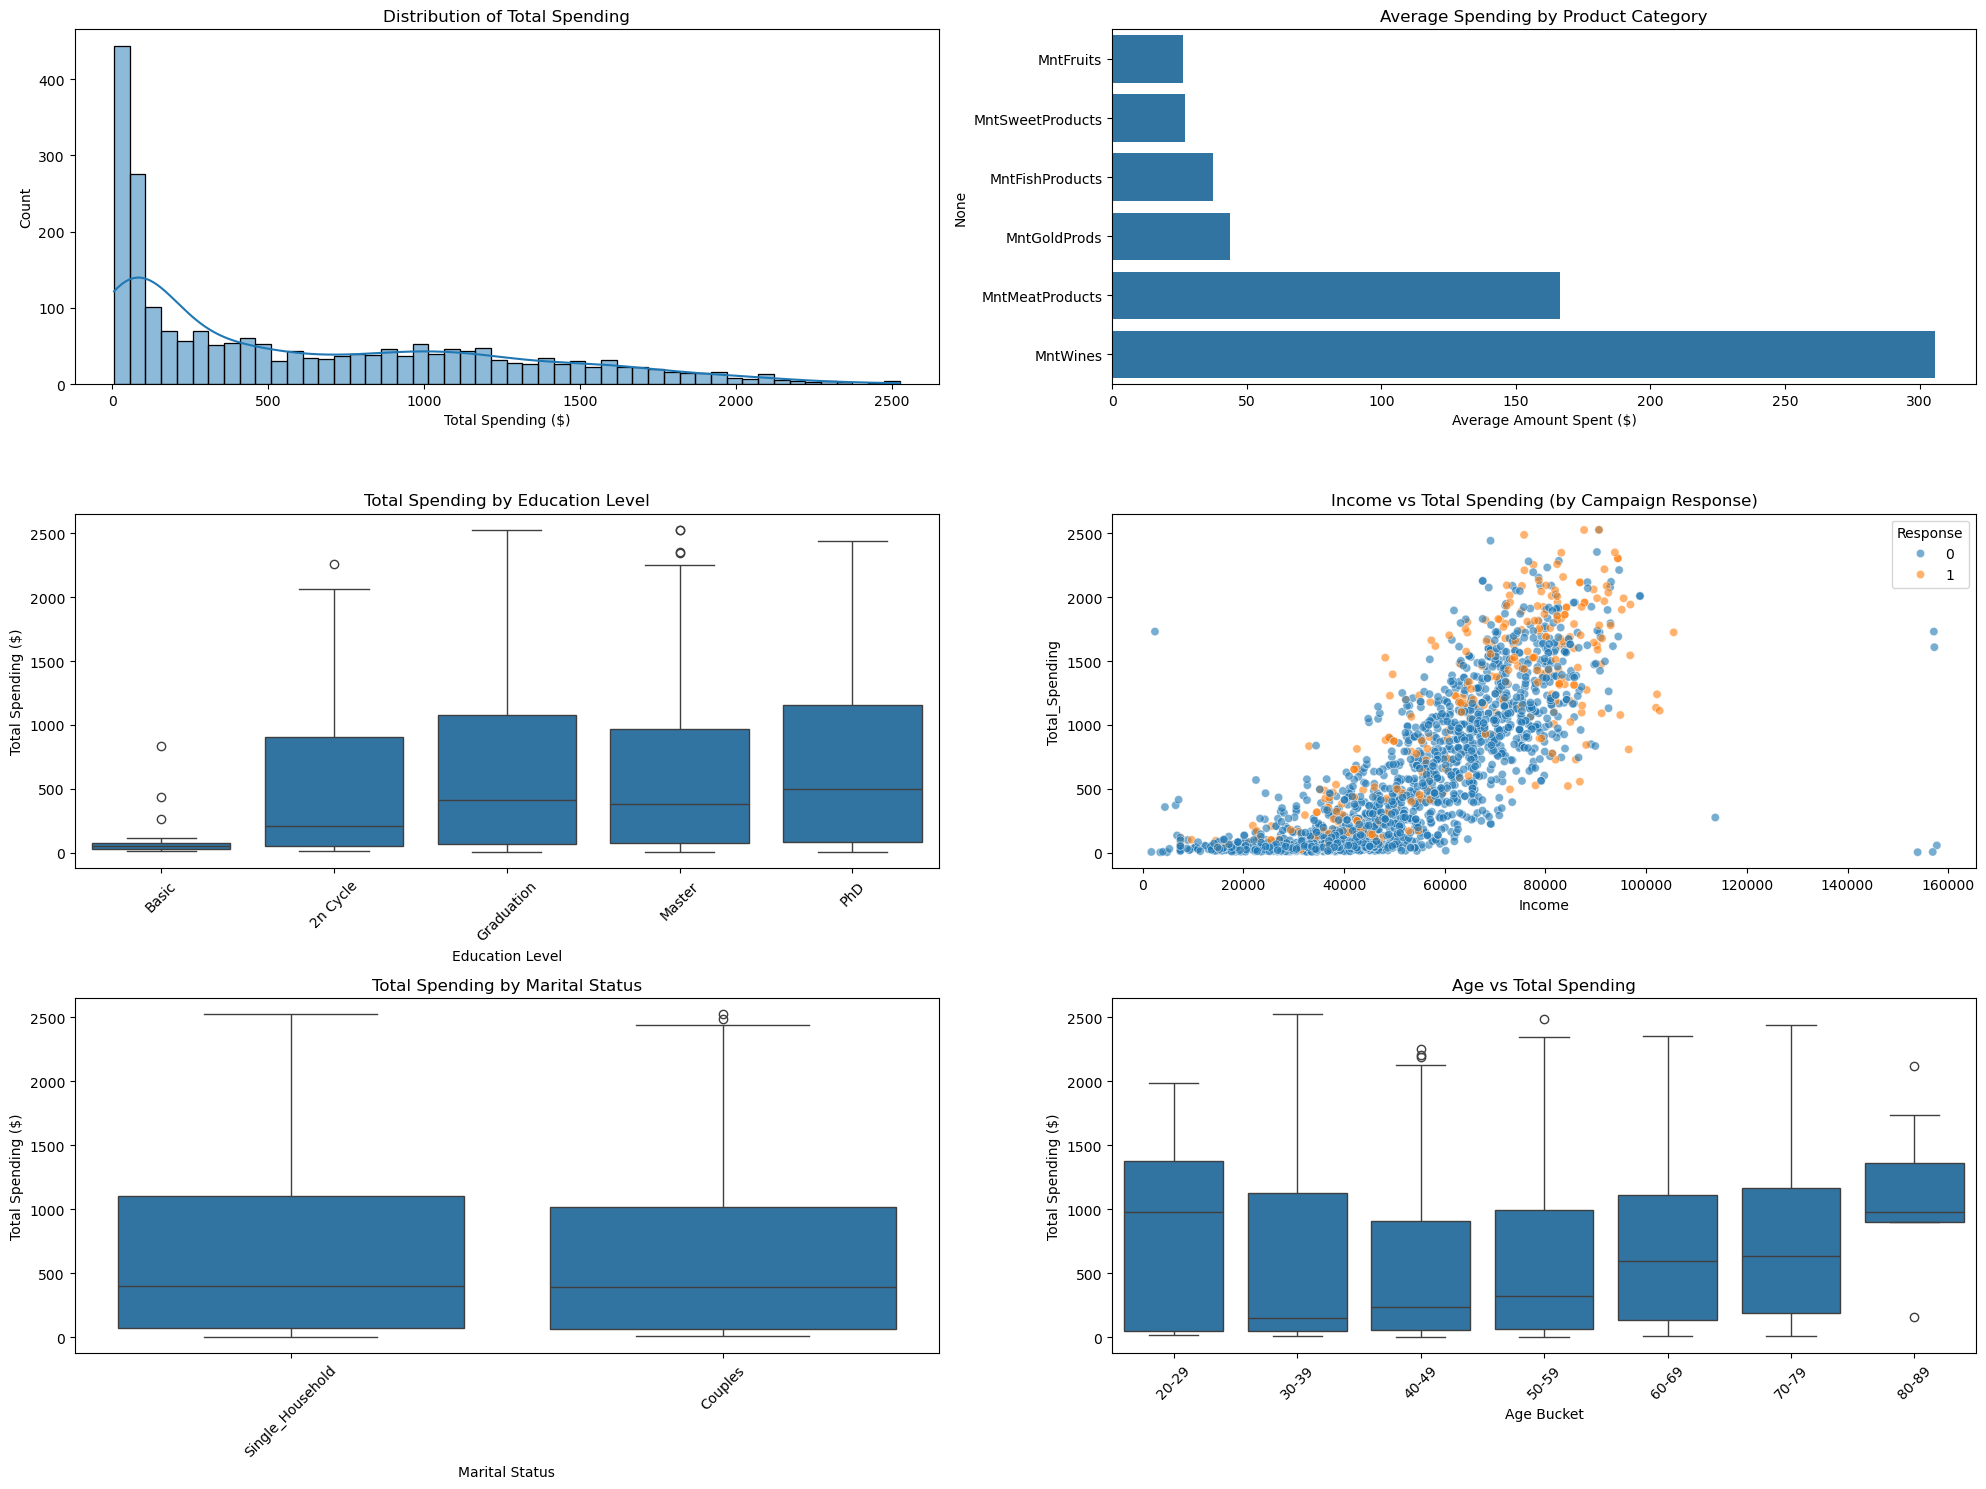

In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

#plt.figure(figsize=(15, 10))

# Create subplot grid
fig, axes = plt.subplots(3, 2, figsize=(20, 15))

ax1, ax2, ax3, ax4, ax5, ax6 = axes.flatten()

# 1. Histogram of Total Spending
sns.histplot(data=df_transformed, 
       x='Total_Spending',
       bins=50,
       kde=True,
       ax=ax1)
ax1.set_title('Distribution of Total Spending')
ax1.set_xlabel('Total Spending ($)')
ax1.set_ylabel('Count')

# 2. Spending by Product Category
spending_cols = ['MntWines', 'MntFruits', 'MntMeatProducts', 
        'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
spending_data = df_transformed[spending_cols].mean().sort_values(ascending=True)

sns.barplot(x=spending_data.values,
       y=spending_data.index,
       ax=ax2)
ax2.set_title('Average Spending by Product Category')
ax2.set_xlabel('Average Amount Spent ($)')

# 3. Education Level vs Total Spending
education_mapping = {
  0: 'Basic',
  1: '2n Cycle',
  2: 'Graduation',
  3: 'Master',
  4: 'PhD'
}
# Map numeric education levels back to categorical labels
df_plot = df_transformed.copy()
df_plot['Education'] = df_plot['Education'].map(education_mapping)

# Update the education level plot
sns.boxplot(data=df_plot,
      x='Education',
      y='Total_Spending',
      order=['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD'],  # Specify order
      ax=ax3)
ax3.set_title('Total Spending by Education Level')
ax3.tick_params(axis='x', rotation=45)
ax3.set_xlabel('Education Level')
ax3.set_ylabel('Total Spending ($)')

# 4. Income vs Total Spending with Campaign Response
sns.scatterplot(data=df_transformed,
        x='Income',
        y='Total_Spending',
        hue='Response',
        alpha=0.6,
        ax=ax4)
ax4.set_title('Income vs Total Spending (by Campaign Response)')

# 5. Different Marital Status vs Total Spending
sns.boxplot(data=df_transformed,
      x='Marital_Status_Grouped',
      y='Total_Spending',
      ax=ax5)
ax5.set_title('Total Spending by Marital Status')
ax5.tick_params(axis='x', rotation=45)
ax5.set_xlabel('Marital Status')
ax5.set_ylabel('Total Spending ($)')

# 6. Age vs Total Spending (Bucketed Age)
age_bins = [20, 30, 40, 50, 60, 70, 80, 90]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
df_transformed['Age_Bucket'] = pd.cut(df_transformed['Age'], bins=age_bins, labels=age_labels)

sns.boxplot(data=df_transformed,
        x='Age_Bucket',
        y='Total_Spending',
        ax=ax6)
ax6.set_title('Age vs Total Spending')
ax6.tick_params(axis='x', rotation=45)
ax6.set_xlabel('Age Bucket')
ax6.set_ylabel('Total Spending ($)')

plt.tight_layout()
plt.show()

# Export the dataset for Clustering and Predictive Model

In [67]:
# Drop original categorical columns if no longer needed
#columns_to_drop = ['Year_Birth', 'Kidhome', 'Teenhome', 'Dt_Customer', 'Marital_Status','Marital_Status_Grouped']
columns_to_drop = ['Year_Birth', 'Dt_Customer', 'Marital_Status','Marital_Status_Grouped']
df_transformed = df_transformed.drop(columns=columns_to_drop)

# Rearrange the data frame to make it easier to understand for correlation matrix
features = [
    # Purchase Data
    'Total_Spending', 'MntWines', 'MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds',
    'Total_Purchase_Num', 'NumWebPurchases','NumCatalogPurchases','NumStorePurchases', 'Discount_Dependency',

    # Demographic Features
    'Income','Age','Education', 'Marital_Merged_Couples', 'Marital_Merged_Single_Household','Kidhome', 'Teenhome','Total_Household_Size','Total_Children',

    # Promotion Responsiveness
    'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Campaign_Response_Rate', 

    # Satisfaction and Loyalty
    'Complain', 'Loyalty_Months', 'Recency', 'NumWebVisitsMonth',

    # Identifier
    'ID'
]
df_transformed = df_transformed[features]
# save the transformed data to csv
df_transformed.to_csv('./data/processed/marketing_campaign_transformed.csv', index=False)

print("Shape of the dataset:", df_transformed.shape)
print("Total # of features after transformation:", df_transformed.shape[1])
print("Features after transformation:\n", df_transformed.dtypes)

Shape of the dataset: (2204, 33)
Total # of features after transformation: 33
Features after transformation:
 Total_Spending                       int64
MntWines                             int64
MntFruits                            int64
MntMeatProducts                      int64
MntFishProducts                      int64
MntSweetProducts                     int64
MntGoldProds                         int64
Total_Purchase_Num                   int64
NumWebPurchases                      int64
NumCatalogPurchases                  int64
NumStorePurchases                    int64
Discount_Dependency                float64
Income                             float64
Age                                  int64
Education                            int64
Marital_Merged_Couples               int32
Marital_Merged_Single_Household      int32
Kidhome                              int64
Teenhome                             int64
Total_Household_Size                 int64
Total_Children                

It is found out the old features and new features have a high corrleation so we should drop the old features and keep the new features only. 

# Scaled Feature Analysis

We analyze the scaled features of the dataset to understand their distributions and relationships. Key steps include:

- **Scaling Numerical Features**: StandardScaler is used to scale numerical features, ensuring they have a mean of 0 and a standard deviation of 1.
- **Correlation Matrix**: A comprehensive correlation matrix is generated to identify the relationships between key features.
- **Visualization**: Heatmaps and other plots are used to visualize the distributions and correlations of the scaled features.

This analysis helps in identifying the most influential features and their interactions, which is crucial for building predictive models and gaining insights into customer behavior.

Scaled Features Summary:
       Total_Spending  MntWines  MntFruits  MntMeatProducts  MntFishProducts  \
count         2204.00   2204.00    2204.00          2204.00          2204.00   
mean            -0.00     -0.00       0.00             0.00             0.00   
std              1.00      1.00       1.00             1.00             1.00   
min             -1.00     -0.91      -0.66            -0.75            -0.69   
25%             -0.89     -0.83      -0.61            -0.68            -0.63   
50%             -0.35     -0.39      -0.46            -0.44            -0.47   
75%              0.73      0.60       0.17             0.30             0.23   
max              3.18      3.52       4.34             7.01             4.06   

       MntSweetProducts  MntGoldProds  Total_Purchase_Num  NumWebPurchases  \
count           2204.00       2204.00             2204.00          2204.00   
mean               0.00          0.00                0.00            -0.00   
std                1

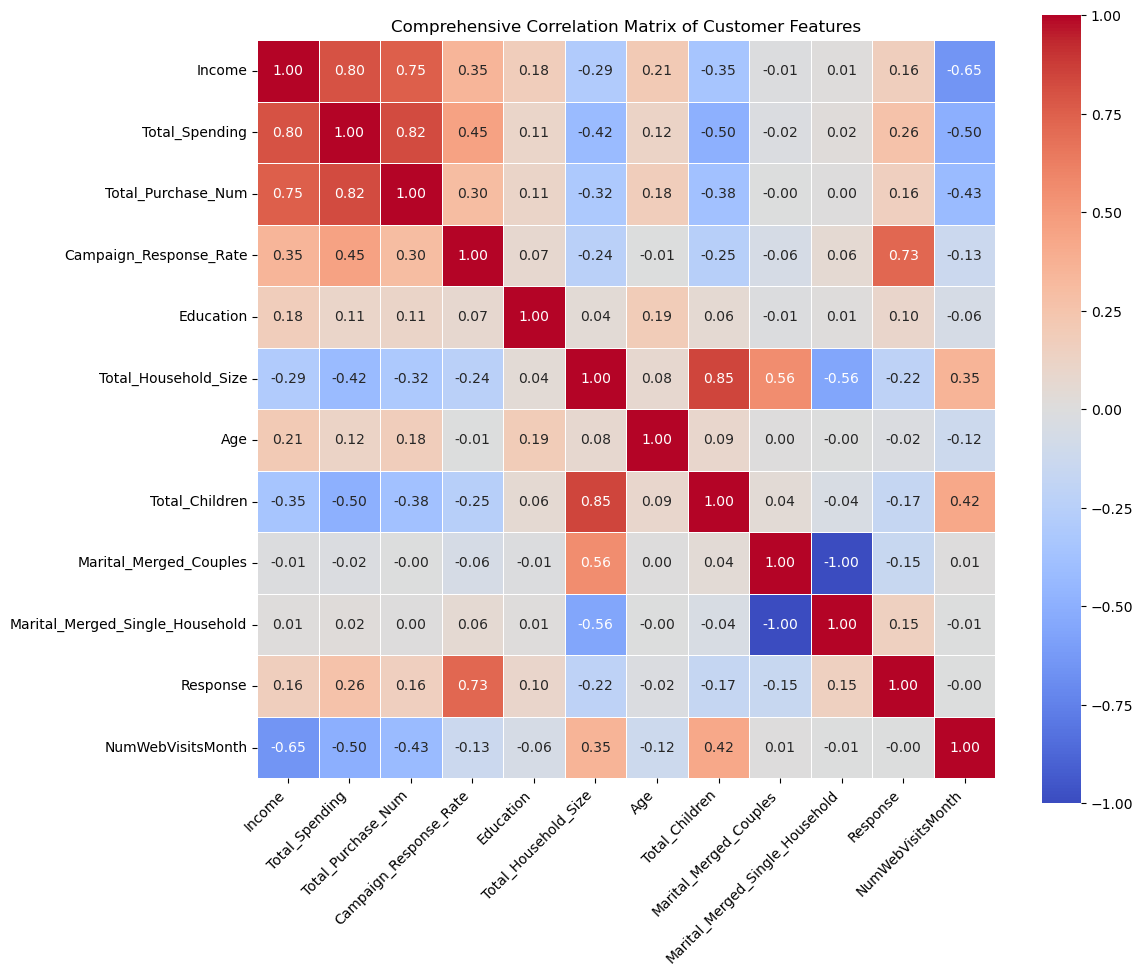


Top 10 Strongest Feature Correlations:
Marital_Merged_Couples  Marital_Merged_Single_Household   -1.000000
Total_Household_Size    Total_Children                     0.849195
Total_Spending          Total_Purchase_Num                 0.823190
Income                  Total_Spending                     0.800796
                        Total_Purchase_Num                 0.750606
Campaign_Response_Rate  Response                           0.725302
Income                  NumWebVisitsMonth                 -0.650018
Total_Household_Size    Marital_Merged_Single_Household   -0.561778
                        Marital_Merged_Couples             0.561778
Total_Spending          NumWebVisitsMonth                 -0.502021
dtype: float64


In [68]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Ensure columns_to_exclude is defined
columns_to_exclude = ['Response','Marital_Merged_Couples', 'Marital_Merged_Single_Household',
                       'Marital_Status_Grouped', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Complain' ]

# Ensure numerical_columns is defined
numerical_columns = df_transformed.select_dtypes(include=['number']).columns

columns_to_scale = [col for col in numerical_columns if col not in columns_to_exclude]

# Convert boolean columns to integers
boolean_columns = df_transformed.select_dtypes(include=['bool']).columns
df_transformed[boolean_columns] = df_transformed[boolean_columns].astype(int)

# Create a copy for scaling
df_scaled = df_transformed.copy()

# Initialize scaler
scaler = StandardScaler()

# Scale numerical features
df_scaled[columns_to_scale] = scaler.fit_transform(df_scaled[columns_to_scale])

# Print summary of scaled features
print("Scaled Features Summary:")
print(df_scaled[columns_to_scale].describe().round(2))

# Verify scaling worked as expected (should see mean ≈ 0 and std ≈ 1)
print("\nVerification of scaling:")
print("Means:", df_scaled[columns_to_scale].mean().abs().mean().round(4))
print("Standard deviations:", df_scaled[columns_to_scale].std().mean().round(4))

# Display correlation matrix for key scaled features
key_features = [
    # Financial Features
    'Income', 'Total_Spending', 'Total_Purchase_Num', 'Campaign_Response_Rate',
    
    # Demographic Features
    'Education', 'Total_Household_Size', 'Age', 'Total_Children',
    
    # Marital Status
    'Marital_Merged_Couples', 'Marital_Merged_Single_Household',
    
    # Response and Engagement
    'Response', 'NumWebVisitsMonth'
]
correlation_matrix = df_scaled[key_features].corr()

# Create heatmap with improved visibility
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, 
            annot=True,
            cmap='coolwarm',
            center=0,
            fmt='.2f',
            square=True,
            linewidths=0.5)

plt.title('Comprehensive Correlation Matrix of Customer Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Print strongest correlations
print("\nTop 10 Strongest Feature Correlations:")
# Get upper triangle of correlations
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
# Stack and sort
strongest_correlations = upper.stack().sort_values(key=abs, ascending=False)[:10]
print(strongest_correlations)

# Key Findings

**Core Drivers: Income, Total_Spending, and Total Purchase Numbers**
- These three variables are primary features for clustering, as they capture the core aspects of purchasing behavior.
- These variables show strong positive correlations: Income and Total_Spending (0.8), Total_Spending and Total_Purchase_Num (0.82), and Income and Total_Purchase_Num (0.75). This suggests that customers with higher incomes tend to spend more and shop more frequently, forming a cohesive group that can be clustered together.
- Thoes 3 features are central to purchasing behavior and segmenting high-value customers.

**Demographic Factors:**
- These demographic and behavioral variables can refine clusters by distinguishing family-oriented or price-sensitive customers from others.
- Total_Household_Size and Total_Children are negatively correlated with Income (-0.34 and -0.29), Total_Spending (-0.42 and -0.5), and Total_Purchase_Num (-0.2 and -0.25). Customers with larger households and more children tend to have lower income, spend less, and shop less often.

**Engagement Patterns:**
- NumWebVisitsMonth is negatively correlated with Income (-0.65), Total_Spending (-0.5), and Total_Purchase_Num (-0.31), indicating that frequent website visitors are likely lower-income, lower-spending customers who may research prices online before buying.
  
**Campaign Success:**
- High spenders and frequent shoppers are more responsive (0.45, 0.25 with Campaign_Response_Rate), while family size and web visits dampen response rates.


**Marketing Strategies:**

- **High-Value Shoppers**: Target with premium offers, exclusive deals, or loyalty programs to capitalize on their spending habits and campaign responsiveness.
  - Characteristics: High Income, high Total_Spending, high Total_Purchase_Num, smaller Total_Household_Size, fewer Total_Children, and lower NumWebVisitsMonth.
  - Profile: Affluent individuals or small households who spend generously and shop frequently, likely prioritizing convenience over price comparison.

- **Budget Shoppers**: Offer discounts, family-oriented promotions, or online deals to appeal to their price sensitivity and website engagement.
  - Characteristics: Lower Income, lower Total_Spending, lower Total_Purchase_Num, larger Total_Household_Size, more Total_Children, and higher NumWebVisitsMonth.
  - Profile: Budget-conscious or family-oriented customers who spend less, shop less often, and use the website to seek deals.

**Campaign Optimization**

Use the predictive model to prioritize customers with high Total_Spending and Total_Purchase_Num for campaigns, while adjusting strategies (e.g., deeper discounts) for less responsive segments like large families or frequent website visitors.

**Feature Optimization**
- Current correlation graph only includes 14 features; we have a total of 42 features. Here are some possibilities to consider adding:
  - **Spending & Shopping Behavior**
    - Category-level spending (MntWines, MntMeatProducts, etc.)
  - **Promotional Campaign Effectiveness**
    - AcceptedCmp1 - AcceptedCmp5: Tracking specific campaign acceptances will refine our understanding of which campaigns perform best among high-spending or frequent shoppers.
    - NumDealsPurchases: Potentially useful in identifying deal-seeking vs. premium customers.
    - NumWebPurchases / NumCatalogPurchases / NumStorePurchases: To differentiate between online shoppers and in-store shoppers.
  - **Household & Marital Influence on Spending**
    - Total_Children: Since it correlates with Total Household Size (0.85), it might be useful in family-oriented product targeting.
  - **Digital Behavior & Web Engagement**
    - NumWebPurchases vs. NumStorePurchases: Comparing digital to offline spending patterns could further enhance segmentation.